In [1]:
import gzip

input_path = 'roadNet-CA.txt.gz'
output_path = 'roadNet-CA.txt'

with gzip.open(input_path, 'rb') as f_in, open(output_path, 'wt') as f_out:
    for line in f_in:
        f_out.write(line.decode('utf-8'))

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


In [3]:
facebook = pd.read_csv(output_path, sep=' ', header=None, names=['source', 'target'])

In [4]:

G = nx.from_pandas_edgelist(facebook)

In [2]:
import spektral

In [5]:
dataset = spektral.datasets.citation.Citation('cora', random_split=False, normalize_x=False)



c:\Users\darth\AppData\Local\Programs\Python\Python38\lib\site-packages\spektral\datasets\citation.py:108: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  a = nx.adjacency_matrix(nx.from_dict_of_lists(graph))  # CSR
c:\Users\darth\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [19]:
import networkx as nx

In [20]:
V = dataset.graphs[0]

In [25]:
# convert spektral graph to networkx graph
G = V.a

G = nx.from_scipy_sparse_array(G)

In [43]:
import matplotlib.pyplot as plt
import networkx as nx

# tag names specifying what game info should be
# stored in the dict on each digraph edge
game_details = ["Event", "Date", "Result", "ECO", "Site"]


def chess_pgn_graph(pgn_file="chess_masters_WCC.pgn.bz2"):
    """Read chess games in pgn format in pgn_file.

    Filenames ending in .bz2 will be uncompressed.

    Return the MultiDiGraph of players connected by a chess game.
    Edges contain game data in a dict.

    """
    import bz2

    G = nx.MultiDiGraph()
    game = {}
    with open(pgn_file) as datafile:
        lines = [line.rstrip("\r\n") for line in datafile]
    for line in lines:
        if line.startswith("["):
            tag, value = line[1:-1].split(" ", 1)
            game[str(tag)] = value.strip('"')
        else:
            # empty line after tag set indicates
            # we finished reading game info
            if game:
                white = game.pop("White")
                black = game.pop("Black")
                G.add_edge(white, black, **game)
                game = {}
    return G


G = chess_pgn_graph('Alekhine.pgn')


In [59]:
len(list(G.nodes()))

test = list(G.nodes())

In [67]:
subG = G.subgraph(test[:200])

In [65]:
data = json_graph.node_link_data(subG)  # Convert to d3.js graph format
with open('graph2.json', 'w') as f:
    json.dump(data, f)

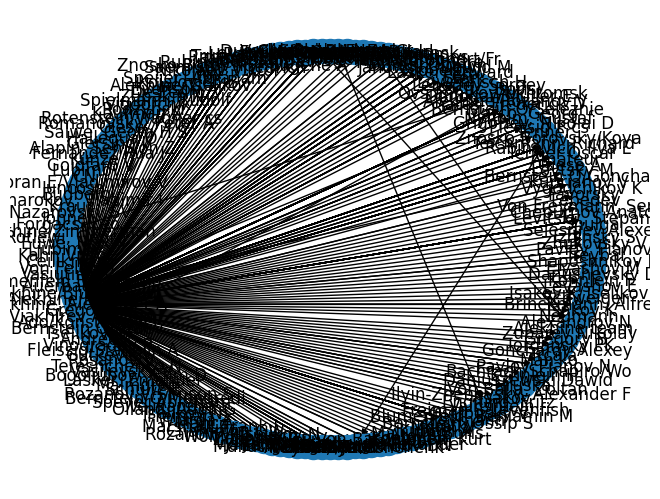

In [68]:
nx.draw_circular(subG, with_labels=True)

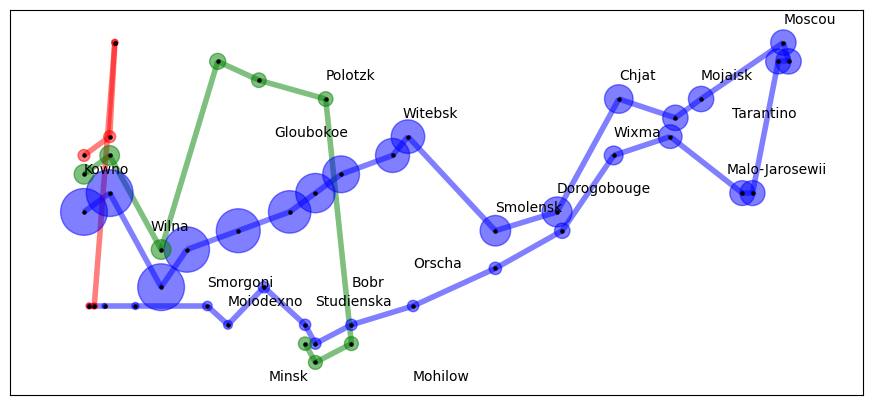

In [30]:
plt.figure(1, figsize=(11, 5))
plt.clf()
colors = ["b", "g", "r"]
for G in g:
    c = colors.pop(0)
    node_size = [G.pop[n] // 300 for n in G]
    nx.draw_networkx_edges(G, G.pos, edge_color=c, width=4, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=node_size, node_color=c, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=5, node_color="k")

for c in city:
    x, y = city[c]
    plt.text(x, y + 0.1, c)
plt.show()

In [39]:
g[1].edges(data=True)

EdgeDataView([(1, 0, {'A': 2}), (1, 2, {'A': 2}), (2, 3, {'A': 2}), (3, 4, {'A': 2}), (4, 5, {'R': 2}), (5, 6, {'R': 2}), (6, 7, {'R': 2}), (7, 8, {'R': 2})])

In [5]:
subG = G.subgraph(list(range(50)))

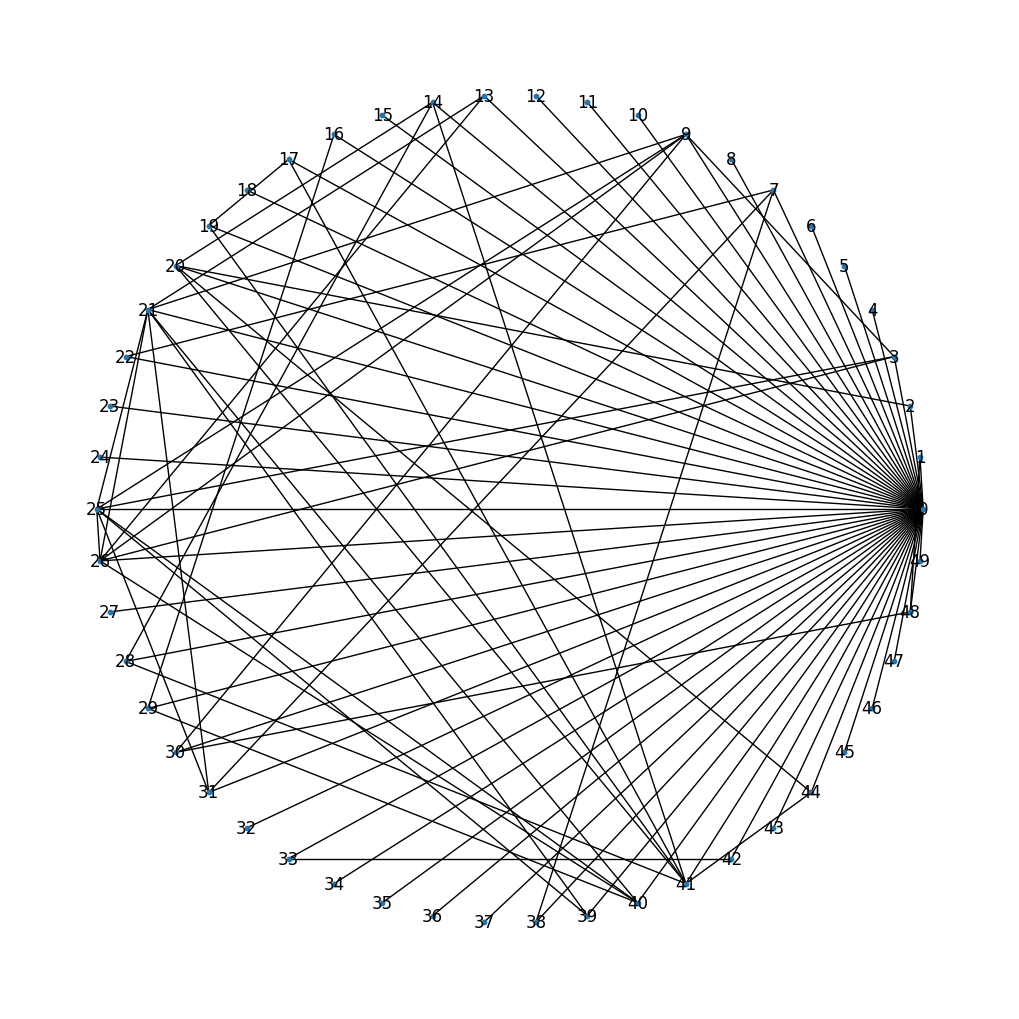

In [6]:

plt.figure(figsize=(10, 10))
nx.draw_circular(subG, node_size=10, with_labels=True)
plt.show()

In [55]:
from networkx.readwrite import json_graph
import json


In [56]:
data = json_graph.node_link_data(subG)  # Convert to d3.js graph format
with open('graph2.json', 'w') as f:
    json.dump(data, f)